In [18]:
# The data given in the url is related with direct marketing campaigns of a banking
# institution. The marketing campaigns were based on phone calls. Often, more
# than one contact to the same client was required, in order to access if the product
# (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to
# predict whether client will subscribe to term deposit

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [46]:
data=pd.read_csv("bank.csv",sep=';')
mydata=data.head(50)
mydata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [47]:
user_data=[250,7]

<AxesSubplot:>

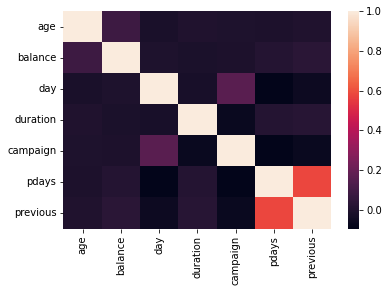

In [48]:
ds=data.corr()
sns.heatmap(ds)

In [60]:
newdata=mydata[['pdays','previous','y']]
data['y'].replace(['no','yes'],[0,1],inplace=True)
cols=['pdays','previous']
X=newdata[cols]
y=newdata['y']
print(newdata)


    pdays  previous  y
0      -1         0  0
1     339         4  0
2     330         1  0
3      -1         0  0
4      -1         0  0
5     176         3  0
6     330         2  0
7      -1         0  0
8      -1         0  0
9     147         2  0
10     -1         0  0
11     -1         0  0
12     -1         0  0
13     -1         0  1
14    241         1  0
15     -1         0  0
16     -1         0  0
17    152         2  0
18     -1         0  0
19    152         1  0
20     -1         0  0
21     -1         0  0
22     -1         0  0
23     -1         0  0
24     -1         0  0
25     -1         0  0
26     -1         0  0
27    105         2  0
28     -1         0  0
29     -1         0  0
30     -1         0  1
31     -1         0  0
32     -1         0  0
33     -1         0  1
34     -1         0  1
35     -1         0  0
36     -1         0  1
37     -1         0  1
38    342         2  1
39     -1         0  0
40    101         3  0
41     -1         0  0
42     -1  

In [50]:
columns=list(X)
columns

['pdays', 'previous']

In [51]:
data_arr= []
dist_arr= []

#n=int(len(X_train)) 
for i in range(0,50):
    for j in columns:
        ele=X[j][i]
        data_arr.append(ele)
        print(data_arr)
    dist =((user_data[0]-data_arr[0]) ** 2 + (user_data[1]-data_arr[1]) ** 2)**0.5 #finding euclidean distance
    dist_arr.append(dist)
    data_arr=[]

[-1]
[-1, 0]
[339]
[339, 4]
[330]
[330, 1]
[-1]
[-1, 0]
[-1]
[-1, 0]
[176]
[176, 3]
[330]
[330, 2]
[-1]
[-1, 0]
[-1]
[-1, 0]
[147]
[147, 2]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[241]
[241, 1]
[-1]
[-1, 0]
[-1]
[-1, 0]
[152]
[152, 2]
[-1]
[-1, 0]
[152]
[152, 1]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[105]
[105, 2]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[342]
[342, 2]
[-1]
[-1, 0]
[101]
[101, 3]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[-1]
[-1, 0]
[5]
[5, 2]
[-1]
[-1, 0]
[-1]
[-1, 0]
[92]
[92, 1]


In [52]:
dist_arr

[251.09759058979438,
 89.05054744357274,
 80.22468448052632,
 251.09759058979438,
 251.09759058979438,
 74.10802925459562,
 80.15609770940699,
 251.09759058979438,
 251.09759058979438,
 103.12128781197411,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 10.816653826391969,
 251.09759058979438,
 251.09759058979438,
 98.12746812182611,
 251.09759058979438,
 98.18350166906862,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 145.08618128546908,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 92.13576938409967,
 251.09759058979438,
 149.05368160498418,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 251.09759058979438,
 245.05101509685693,
 251.09759058979438,

In [53]:
result = pd.DataFrame(dist_arr)
result

,0
0,251.097591
1,89.050547
2,80.224684
3,251.097591
4,251.097591
5,74.108029
6,80.156098
7,251.097591
8,251.097591
9,103.121288


In [54]:
result['pdays']= X['pdays']
result['previous']= X['previous']
result['y']= newdata['y']
result

,0,pdays,previous,y
0,251.097591,-1,0,no
1,89.050547,339,4,no
2,80.224684,330,1,no
3,251.097591,-1,0,no
4,251.097591,-1,0,no
5,74.108029,176,3,no
6,80.156098,330,2,no
7,251.097591,-1,0,no
8,251.097591,-1,0,no
9,103.121288,147,2,no


In [57]:
k = math.sqrt(50)

#k= 20 ** 0.5
k

7.0710678118654755

In [62]:
k=7
result.nsmallest(8,[0])

,0,pdays,previous,y
14,10.816654,241,1,no
5,74.108029,176,3,no
6,80.156098,330,2,no
2,80.224684,330,1,no
1,89.050547,339,4,no
38,92.135769,342,2,yes
17,98.127468,152,2,no
19,98.183502,152,1,no


In [65]:
# def score(X_test, y_test):
#         predictions = predict(X_test)
#         return (predictions == y_test).sum() / len(y_test)

# print("Accuracy : ",score(X,y))